# Comparative study of regressor and classifier with decision tree using modern tools

### Importing libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


### Reading data

In [56]:
dataset=pd.read_csv("data.csv")

Presently, to anticipate if a client will buy the item, one necessity to discover the connection between Age and Estimated Salary.
Here User ID and Gender are not significant components for discovering this. Using python, we can select features and labels.

In [57]:
#Features
x= dataset[['Age','EstimatedSalary']]
#Labels
y = dataset['Purchased']

After that,we will part the dataset into train information and
test information. Here we split 75% of the information for preparing the model and 25% of information to test the presentation of
our model

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.25)

Perform highlight scaling here because Age and Estimated Salary highlights esteem lie in various reaches implies that huge hole
between them.If we donot do the scalingof the Estimated Salary
and Age features then the Estimated Salary feature will be strong
when compared to the Age feature.

In [59]:
scale_x = MinMaxScaler()
x_train_s = scale_x.fit_transform(x_train)
x_test_s = scale_x.transform(x_test)

Hence, we are training our Decision Tree model as a classifier
using the library in python and then fit the model with training
data of feature and label. After that,we can predict test values using
test data of features.

In [60]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train_s, y_train)
y_predict = model_dt.predict(x_test_s)


So, we can find predicted values with respect to actual values of
test data from the dataframe and create a new dataframe for actual
and predicted values

<AxesSubplot:xlabel='[Age]', ylabel='Purchased'>

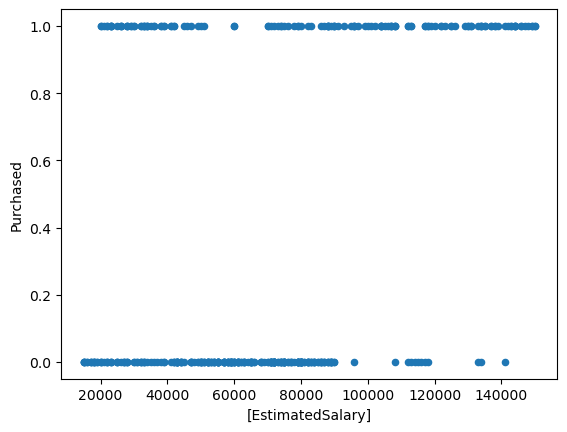

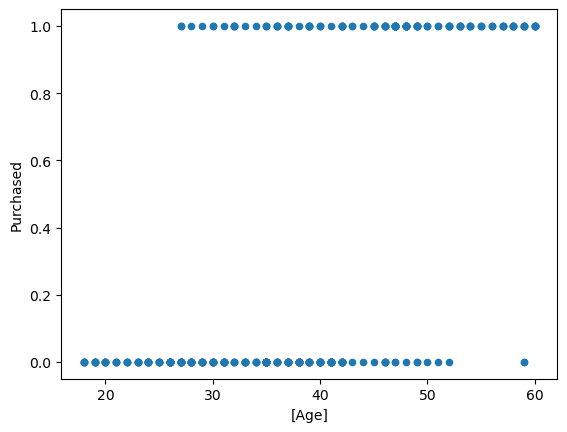

In [61]:
dataset.plot.scatter(x = ['EstimatedSalary'], y = 'Purchased')
dataset.plot.scatter(x = ['Age'], y = 'Purchased')

In [62]:
print('The accuracy of the Decision tree classifier is',accuracy_score(y_test, y_predict))

The accuracy of the Decision tree classifier is 0.89


In [63]:
print("MSE:", mean_squared_error(y_test, y_predict))
print("RMSE:", r2_score(y_test, y_predict))
print("MAE:", mean_absolute_error(y_test, y_predict))

MSE: 0.11
RMSE: 0.5376208490962588
MAE: 0.11


In [64]:
confusion_matrix(y_test, y_predict)

array([[56,  5],
       [ 6, 33]], dtype=int64)

### Adding Gender to the features

In [65]:
from sklearn.preprocessing import LabelEncoder

# Create the label encoder
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])

In [66]:
x['Gender']=dataset['Gender']

C:\Users\Aya\AppData\Local\Temp\ipykernel_1316\2839916068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Gender']=dataset['Gender']


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.25,random_state=42)

In [68]:
scale_x = MinMaxScaler()
x_train_s = scale_x.fit_transform(x_train)
x_test_s = scale_x.transform(x_test)

In [69]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train_s, y_train)
y_predict = model_dt.predict(x_test_s)

In [70]:
print('The accuracy of the Decision tree classifier is after adding Gender ',accuracy_score(y_test, y_predict))

The accuracy of the Decision tree classifier is after adding Gender  0.82


In [71]:
print("MSE:", mean_squared_error(y_test, y_predict))
print("RMSE:", r2_score(y_test, y_predict))
print("MAE:", mean_absolute_error(y_test, y_predict))

MSE: 0.18
RMSE: 0.22779922779922768
MAE: 0.18


In [72]:
confusion_matrix(y_test, y_predict)

array([[55,  8],
       [10, 27]], dtype=int64)

## Decision Tree as a Regressor

In [88]:
#Features
x_reg= dataset[['Age','EstimatedSalary']]
#Labels
y_reg = dataset['Purchased']

In [89]:
x_train_reg, x_test_reg, y_train, y_test = train_test_split(x_reg, y_reg,test_size = 0.25)

In [90]:
scale_x = MinMaxScaler()
x_train_s = scale_x.fit_transform(x_train_reg)
x_test_s = scale_x.transform(x_test_reg)

In [91]:
model_r= DecisionTreeRegressor()
model_dt.fit(x_train_s, y_train)
y_predict = model_dt.predict(x_test_s)

In [92]:
print('The accuracy of the regressor: ',accuracy_score(y_test, y_predict))

The accuracy of the regressor:  0.86


In [93]:
print("MSE:", mean_squared_error(y_test, y_predict))
print("RMSE:", r2_score(y_test, y_predict))
print("MAE:", mean_absolute_error(y_test, y_predict))

MSE: 0.14
RMSE: 0.38461538461538447
MAE: 0.14


In [94]:
confusion_matrix(y_test, y_predict)

array([[59,  6],
       [ 8, 27]], dtype=int64)

## Adding Gender to the features

In [95]:
from sklearn.preprocessing import LabelEncoder

# Create the label encoder
le = LabelEncoder()

dataset['Gender'] = le.fit_transform(dataset['Gender'])

In [96]:
x['Gender']=dataset['Gender']

C:\Users\Aya\AppData\Local\Temp\ipykernel_1316\2839916068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Gender']=dataset['Gender']


In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.25)

In [98]:
scale_x = MinMaxScaler()
x_train_s = scale_x.fit_transform(x_train)
x_test_s = scale_x.transform(x_test)

In [99]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train_s, y_train)
y_predict = model_dt.predict(x_test_s)

In [100]:
print('The accuracy of the Decision tree regressor is',accuracy_score(y_test, y_predict))

The accuracy of the Decision tree regressor is 0.87


In [101]:
print("MSE:", mean_squared_error(y_test, y_predict))
print("RMSE:", r2_score(y_test, y_predict))
print("MAE:", mean_absolute_error(y_test, y_predict))

MSE: 0.13
RMSE: 0.4285714285714285
MAE: 0.13


In [102]:
confusion_matrix(y_test, y_predict)

array([[59,  6],
       [ 7, 28]], dtype=int64)